In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

In [9]:
df = yf.download('KO', start='2020-08-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
def strategy(df, window=1):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["prior_n"] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df["position"] = [1 if i > 0 else -1 for i in df.prior_n]
    df["strat"] = df.position.shift(1) * df.ret
    return np.exp(df[["ret", "strat"]].cumsum()).plot(figsize=(12,6))

<Axes: xlabel='Date'>

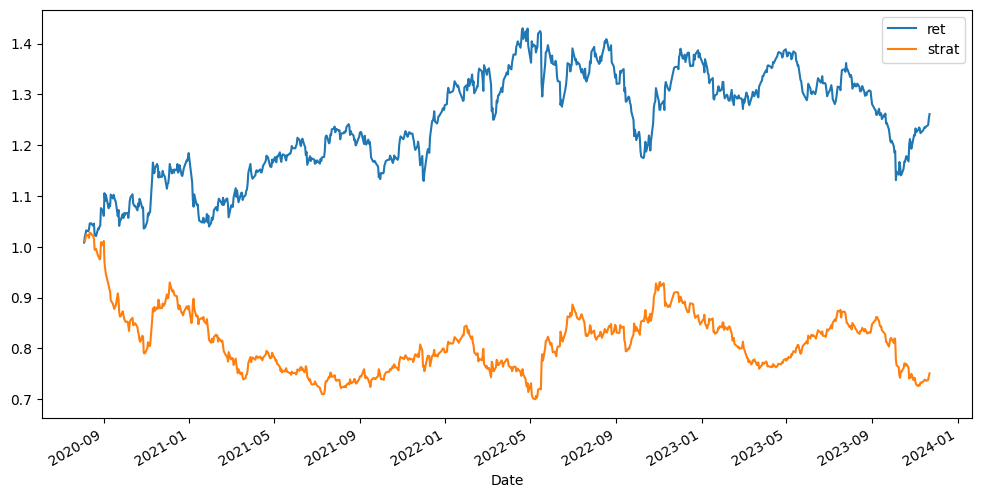

In [7]:
strategy(df, window=1)

In [11]:
def strategy(df, window=1):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["prior_n"] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df["position"] = [1 if i > 0 else 0 for i in df.prior_n]
    df["strat"] = df.position.shift(1) * df.ret
    return np.exp(df[["ret", "strat"]].cumsum()).plot(figsize=(12,6))

In [5]:
df1 = yf.download("BTC-USD", start="2023-11-16", interval='1m')

[*********************100%%**********************]  1 of 1 completed


In [8]:
strategy(df1, window=1)

NameError: name 'df1' is not defined

In [6]:
def strategy(df, window=1):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["prior_n"] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df["position"] = [1 if i > 0 else 0 for i in df.prior_n]
    df["strat"] = df.position.shift(1) * df.ret
    return df

In [20]:
strategy(df1).tail(2).iloc[1].Close

37342.57421875